Hello together,

in this binder, we take a look at the impact of different parameters on the accuracy of the models. In the following, the network architecture, epoch number, Optimizer, activation functions, as well as the batch size and learning rate are looked at.

Value was placed on the readability and the performance, while keeping the performance in the eye.
In the end, there is still a small data analysis to visualize the result.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sn
#from sklearn.model_selection import train_test_split
#import datatime

In [2]:
%load_ext watermark
%watermark -v -m -p numpy,tensorflow,pandas,seaborn,matplotlib

print(" ")
%watermark -u -b -t -z

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.7.0

numpy     : 1.21.5
tensorflow: 2.11.0
pandas    : 1.4.4
seaborn   : 0.11.2
matplotlib: 3.5.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
CPU cores   : 4
Architecture: 64bit

 
Last updated: 15:52:30Mitteleuropäische Zeit

Git branch: 



In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train/255 
x_test = x_test/255

We take a look at what the network gets as input. To do this, we look at the first 56 numbers, just as the network processes them.

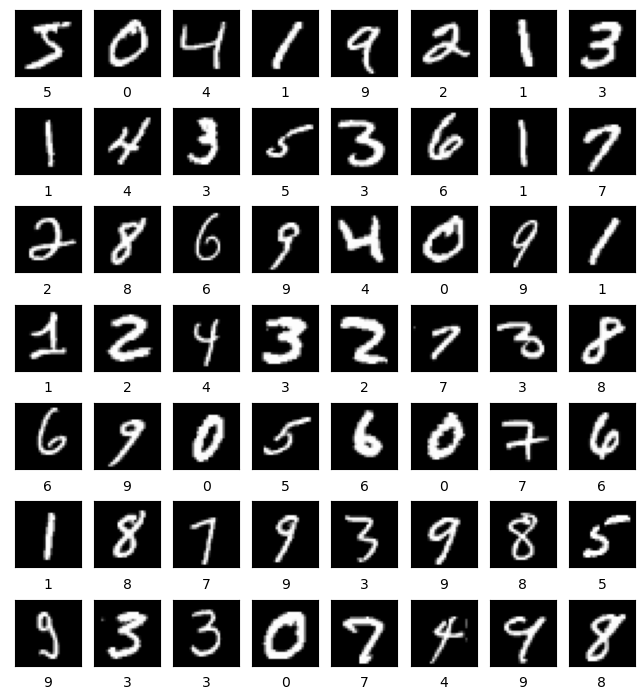

In [17]:
numbers_to_display = 56
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(8,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

## The first tests refer to different layer configurations:
The size of a network, its storage capacity, setting possibilities and ability to learn is determined. In the next part, it is examined whether the number of layers and the neurons in a network also increases the accuracy of the predictions or whether it is overfitted.
In the following, it is examined whether the number of layers and the neurons in a network also increases the accuracy of the predictions or whether it is overdue.
The number of patterns that a KNN can learn depends on the number of nodes. In conjunction with the number of layers, they indicate how many extensive patterns a network can learn. 

Model 1 is my benchmark in my whole test.

Various nodes and layers were considered for the investigation:


    Model 1  consists of     4 Layers * 512 neurons
    Model 2  consists of     2 Layers * 512 neurons
    Model 3  consists of     4 Layers * 256 neurons
    Model 4  consists of     4 Layers mit 512, 256, 128, 64 neurons

In [5]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
    
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#for Tensorboard
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history1 = model1.fit(x_train, y_train, epochs=10, shuffle=True)

_, validation_acc_temp1 = model1.evaluate(x_test, y_test)
validation_acc = round(validation_acc_temp1 * 100, 2)
print('validation accuracy:', validation_acc )

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2160 - accuracy: 0.9353
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1056 - accuracy: 0.9699
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0777 - accuracy: 0.9776
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0635 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0527 - accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0447 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0390 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0372 - accuracy: 0.9898
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0305 - accuracy: 0.9914
Epoch 10/10
313/313 [==============================] - 1s 4ms/st

In [6]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=10, shuffle=True)

_, validation_acc_temp2 = model2.evaluate(x_test, y_test)
validation_acc2 = round(validation_acc_temp2 * 100, 2)
print('validation accuracy2:', validation_acc2, '%')

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1829 - accuracy: 0.9437
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0787 - accuracy: 0.9759
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0538 - accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0414 - accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0343 - accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0280 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0254 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0227 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0178 - accuracy: 0.9947
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - l

In [7]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
    
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, epochs=10, shuffle=True)

_, validation_acc_temp3 = model3.evaluate(x_test, y_test)
validation_acc3 = round(validation_acc_temp3 * 100, 2)
print('validation accuracy3:', validation_acc3, '%')

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2176 - accuracy: 0.9344
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1013 - accuracy: 0.9707
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0741 - accuracy: 0.9778
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0584 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0495 - accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0419 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0371 - accuracy: 0.9886
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0306 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0270 - accuracy: 0.9916
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0926 

In [9]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model4.compile(optimizer='Adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history4 = model4.fit(x_train, y_train, epochs=10, shuffle=True)

_, validation_acc_temp4 = model4.evaluate(x_test, y_test)
validation_acc4 = round(validation_acc_temp4 * 100, 2)
print('validation accuracy4:', validation_acc4, '%')

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2505 - accuracy: 0.9228
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1240 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0939 - accuracy: 0.9717
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0760 - accuracy: 0.9768
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0658 - accuracy: 0.9797
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0565 - accuracy: 0.9828
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0486 - accuracy: 0.9849
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0440 - accuracy: 0.9866
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0414 - accuracy: 0.9869
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1018 

After which the models have been learned and validated, we come to the first comparison. The accuracy of the validation data is compared to Model 1. All networks learn 10 epochs and have the same compile configurations.

In [ ]:
print('accuracy of Benchmark: ' ,validation_acc, '%')
print('accuracy of Model 2:   ' ,validation_acc2, '%')
print('accuracy of Model 3:   ' ,validation_acc3, '%')
print('accuracy of Model 4:   ' ,validation_acc4, '%\n')

Diff1 = round(validation_acc - validation_acc2, 4)
print("difference from Model 2 to Model 1 is: ", Diff1, "%")
Diff2 = round(validation_acc - validation_acc3, 4)
print("difference from Model 3 to Model 1 is: ", Diff2, "%")
Diff3 = round(validation_acc - validation_acc4, 4)
print("difference from Model 4 to Model 1 is: ", Diff3, "%")

Model 2 and 4 are only slightly more accurate and Model 3 is inaccurate.
You don't see any big improvements in this simple network. Accuracy also fluctuates slightly. 
It should be noted, however, that Model 3, with 0.2 of Model 1's learning time, produces almost the same accuracy.

The size and the convoluity have an influence on the over- or underfitting of the net.

A layer with few neurons may not have enough capacity to detect complex patterns in the data, while a layer with too many neurons may be overly complicated and thus hard to train. There are no fixed rules for selecting the number of neurons in a layer, and it is often necessary to test different numbers of neurons to achieve the best performance.

However, as a rule, it is recommended that the number of neurons in each layer be increased when the network becomes deeper, as this gives the network more capacity to detect more complex patterns. It is important to note, however, that too large a number of neurons can also cause the network to become overly complicated and thus difficult to train.

Here is the accuracy and the Loss of Model1-4 shown:

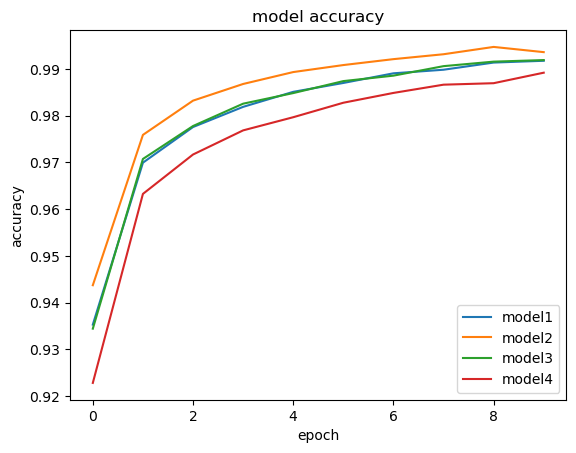

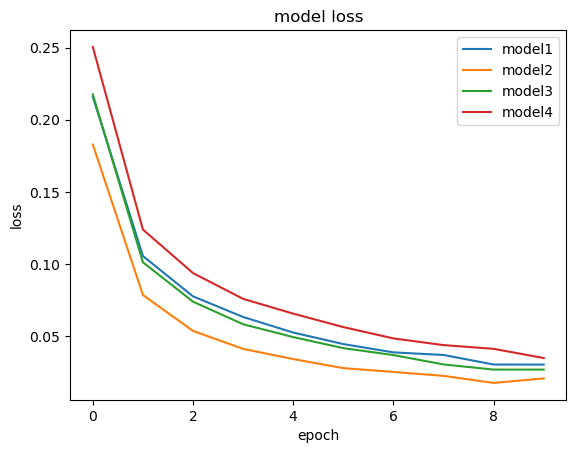

In [18]:
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])


plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model1', 'model2', 'model3', 'model4'], loc='lower right')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.plot(history4.history['loss'])


plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model1', 'model2', 'model3', 'model4'], loc='upper right')
plt.show()

In the first diagram, therefore, the accuracy diagram shows that Model 2 had the highest accuracy in the learning set, and thus also the largest deviation to the validation set.

In the loss diagram it can also be seen that Model 1,3,4 is relatively close to each other, but the Loss of Model 2 is again visibly lower, which fits to the accuracy diagram.

## In germany we say "Übung macht den Meister" and i think that's beautiful.
In the language of the neural networks, a single pass through the feedback loop is often referred to as an epoch. So the larger the number of epochs of a neural network, the longer it has been trained.

In the next step, we're looking at the influence of the epochs.

In [15]:
epoch_list = [2, 7, 20]
history_epochs_list = [0,0,0]
validation_epochs_list = [0,0,0]
for i in range(3):
    temp_modelname = 'model' + str(epoch_list[i])
    name = 'model' + str(epoch_list[i])
    temp_modelname = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
    
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
    
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    temp_modelname.compile(optimizer= 'adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = temp_modelname.fit(x_train, y_train, epochs=epoch_list[i], shuffle=True)
    
    _, validation_temp = temp_modelname.evaluate(x_test, y_test)
    validation_epochs_list[i] = round(validation_temp * 100, 2)
    print('validation accuracy of', name, 'is:', validation_epochs_list[i], ' %\n' )

Epoch 1/2
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2138 - accuracy: 0.9373
Epoch 2/2
313/313 [==============================] - 1s 4ms/step - loss: 0.1151 - accuracy: 0.9671
validation accuracy of model2 is: 96.71  %

Epoch 1/7
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2136 - accuracy: 0.9361
Epoch 2/7
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1030 - accuracy: 0.9706
Epoch 3/7
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0790 - accuracy: 0.9775
Epoch 4/7
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0611 - accuracy: 0.9827
Epoch 5/7
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0536 - accuracy: 0.9852
Epoch 6/7
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0455 - accuracy: 0.9870
Epoch 7/7
313/313 [==============================] - 1s 4ms/step - loss: 0.0997 - accuracy: 0.9779
validation accuracy of model7 is: 97.

In [19]:
print('accuracy of Benchmark:    ', validation_acc, '%')
print('accuracy of Model ep_2:   ', validation_epochs_list[0], '%')
print('accuracy of Model ep_7:   ', validation_epochs_list[1], '%')
print('accuracy of Model ep_20:  ', validation_epochs_list[2], '%\n')

Diff_ep2 = round(validation_acc - validation_epochs_list[0], 4)
print("difference from Model_ep2 to Model 1 is:  ", Diff_ep2, "%")
Diff_ep7 = round(validation_acc - validation_epochs_list[1], 4)
print("difference from Model_ep7 to Model 1 is:  ", Diff_ep7, "%")
Diff_ep20 = round(validation_acc - validation_epochs_list[2], 4)
print("difference from Model_ep20 to Model 1 is: ", Diff_ep20, "%")

accuracy of Benchmark:     97.85 %
accuracy of Model ep_2:    96.71 %
accuracy of Model ep_7:    97.79 %
accuracy of Model ep_20:   98.16 %

difference from Model_ep2 to Model 1 is:   1.14 %
difference from Model_ep7 to Model 1 is:   0.06 %
difference from Model_ep20 to Model 1 is:  -0.31 %


I can confirm my thesis "exercise makes perfect". The longer the model learns, the more accurate the prediction. Too much learning leads to overfitting and the network learns the training set by heart, which makes many errors happen at the validation set. Overfitting can be prevented by applying the dropout technique. In this case, one observation is in each case randomly excluded from the algorithm. This will affect all other connections of the nodes. The dropout method will not be tried in the following tests.

## After we have looked at the layer structures and the learning epochs, we will test different optimizer in the next step.
When training deep learning models, it is essentially a matter of adapting the weightings of the neural network until the global minimum of the loss function is found. The Optimizer is responsible for this task. The most suitable Optimizer for most applications are based on the gradient stage method, in which the weightings are calculated using the gradient of the loss function.
Here we look at the Optimizer: 'Adamax', 'Nadam', 'RMSprop', 'Adadelta', 'Adagrad', ' SGD nearer.

**Adam Optimizer** in benchmark model:
A combination of the idea of the Momentum optimizer and RMSProp results in the Adam optimization.
Adam is the abbreviation for Adaptive Torque Estimation. In the case of the combination, the method now considers both the average of the previous gradients (momentum optimizers) and the average of the squared gradients (**RMSProp, Adadelta, Adagrad**), both under exponential decay.

A function that changes per iteration (for example, by implementing stochastics or mini-batch gradient procedures).
A change from Adam is obtained by replacing the portion of the Momentum optimizer with that of Nesterov. This is then called Nadam ("Nesterovs Adaptive Moment Estimation").
**Adamax**, a variant of Adam based on the infinity norm, is a first-order gradient-based optimization method. 

The optimizer **SGD** (Stochastic Gradient Descent) calculates only stochastic methods. SGD by itself is inherently sequential: Step-by-step, we progress further towards the minimum. Running it provides good convergence but can be slow particularly on large datasets. 

source: https://docplayer.org/201945619-Numerische-optimierung-fuer-deep-learning-algorithmen.html

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2106 - accuracy: 0.9362
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0836 - accuracy: 0.9739
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0526 - accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0324 - accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0208 - accuracy: 0.9932
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0145 - accuracy: 0.9955
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0091 - accuracy: 0.9973
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0065 - accuracy: 0.9977
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0037 - accuracy: 0.9989
Epoch 10/10
313/313 [==============================] - 1s 4ms/st

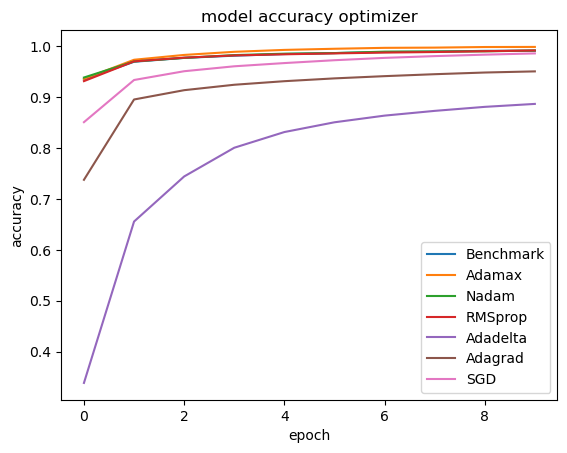

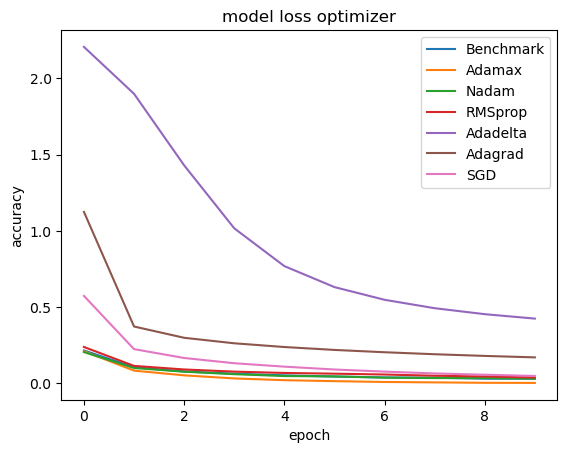

In [11]:
optimizer_list = ['Adamax', 'Nadam', 'RMSprop', 'Adadelta', 'Adagrad', 'SGD']
history_optimizer_list = [0,0,0,0,0,0]
validation_optimizer_list = [0,0,0,0,0,0]
for i in range(6):
    temp_modelname = 'model_' + str(optimizer_list[i])
    name = 'model_' + str(optimizer_list[i])
    temp_modelname = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
    
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
    
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    temp_modelname.compile(optimizer=optimizer_list[i],
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history_optimizer_list[i] = temp_modelname.fit(x_train, y_train, epochs=10, shuffle=True)
    
    
    _, validation_temp = temp_modelname.evaluate(x_test, y_test)
    validation_optimizer_list[i] = round(validation_temp * 100, 2)
    print('validation accuracy of', name, 'is:', validation_optimizer_list[i], ' %\n' )
    
    if i == 5:
        plt.plot(history1.history['accuracy'])
        plt.plot(history_optimizer_list[0].history['accuracy'])
        plt.plot(history_optimizer_list[1].history['accuracy'])
        plt.plot(history_optimizer_list[2].history['accuracy'])
        plt.plot(history_optimizer_list[3].history['accuracy'])
        plt.plot(history_optimizer_list[4].history['accuracy'])
        plt.plot(history_optimizer_list[5].history['accuracy'])
        plt.title('model accuracy optimizer')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['Benchmark','Adamax', 'Nadam', 'RMSprop', 'Adadelta', 'Adagrad', 'SGD'], loc='lower right')
        plt.show()
        
        plt.plot(history1.history['loss'])
        plt.plot(history_optimizer_list[0].history['loss'])
        plt.plot(history_optimizer_list[1].history['loss'])
        plt.plot(history_optimizer_list[2].history['loss'])
        plt.plot(history_optimizer_list[3].history['loss'])
        plt.plot(history_optimizer_list[4].history['loss'])
        plt.plot(history_optimizer_list[5].history['loss'])
        plt.title('model loss optimizer')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['Benchmark','Adamax', 'Nadam', 'RMSprop', 'Adadelta', 'Adagrad', 'SGD'], loc='upper right')
        plt.show()

In [48]:
print('accuracy of Benchmark:      ', validation_acc, '%')
print('accuracy of Model Adamax:   ', validation_optimizer_list[0], '%')
print('accuracy of Model Nadam:    ', validation_optimizer_list[1], '%')
print('accuracy of Model RMSprop:  ', validation_optimizer_list[2], '%')
print('accuracy of Model Adadelta: ', validation_optimizer_list[3], '%')
print('accuracy of Model Adagrad:  ', validation_optimizer_list[4], '%')
print('accuracy of Model SGD:      ', validation_optimizer_list[5], '%\n')

Diff_Adamax = round(validation_acc - validation_optimizer_list[0], 4)
print("difference from Adamax to Model 1 is:    ", Diff_Adamax, "%")
Diff_Nadam = round(validation_acc - validation_optimizer_list[1], 4)
print("difference from Nadam to Model 1 is:     ", Diff_Nadam, "%")
Diff_RMSprop = round(validation_acc - validation_optimizer_list[2], 4)
print("difference from RMSprop to Model 1 is:   ", Diff_RMSprop, "%")
Diff_Adadelta = round(validation_acc - validation_optimizer_list[3], 4)
print("difference from Adadelta to Model 1 is:  ", Diff_Adadelta, "%")
Diff_Adagrad = round(validation_acc - validation_optimizer_list[4], 4)
print("difference from Adagrad to Model 1 is:   ", Diff_Adagrad, "%")
Diff_SGD = round(validation_acc - validation_optimizer_list[5], 4)
print("difference from SGD to Model 1 is:       ", Diff_SGD, "%")

accuracy of Benchmark:       97.85 %
accuracy of Model Adamax:    98.44 %
accuracy of Model Nadam:     98.02 %
accuracy of Model RMSprop:   98.02 %
accuracy of Model Adadelta:  89.46 %
accuracy of Model Adagrad:   94.99 %
accuracy of Model SGD:       97.75 %

difference from Adamax to Model 1 is:     -0.59 %
difference from Nadam to Model 1 is:      -0.17 %
difference from RMSprop to Model 1 is:    -0.17 %
difference from Adadelta to Model 1 is:   8.39 %
difference from Adagrad to Model 1 is:    2.86 %
difference from SGD to Model 1 is:        0.1 %


In this example, all the tested opizimers are worse than Adam, except Adamax and RMSprop.
Where the accuracy only fluctuates very slightly around the benchmark.
Adadelta is particularly unsuitable, and the Adagrad, which is related to him.

Depending on the performance of the optimizer, the learningrate is because each optimizer has its full potential at a different learning rate. We should know that dependence, but we will not test it.

## Next test with various activation functions

We need to use activation functions such as ReLu, Sigmoid and tanh to give the neural network a nonlinear property. In this way, the network can model more complex relationships and patterns in the data. At this point we should use the most important activation functions that are used in deep learning.

In Benchmark we use **ReLU**. The Rectified Linear Unit is the most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value  x  it returns that value back.

**Softmax** is always applied here in the last layer and only if the neural network is to predict probability values in classification tasks.

**SoftPlus** is a smooth approximation to the ReLU function and can be used to constrain the output of a machine to always be positive.
For numerical stability the implementation reverts to the linear function for inputs above a certain value.

**Tanh** is like logistic sigmoid but better. The range of the tanh function is from (-1 to 1). tanh is also sigmoidal (s - shaped). The advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.

As an alternative to hyperbolic tangent, softsign is an activation function for neural networks. Even though tanh and softsign functions are closely related, tanh converges exponentially whereas softsign converges polynomially. Even though softsign appears in literature, it would not be adopted in practice as much as tanh.

In [12]:
activation_list = ['sigmoid', 'softplus', 'tanh', 'softsign']
history_activation_list = [0,0,0,0]
validation_activation_list = [0,0,0,0]
for i in range(4):
    name = 'model_' + str(activation_list[i])
    temp_modelname = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
    
      tf.keras.layers.Dense(512, activation= activation_list[i]),
      tf.keras.layers.Dense(512, activation= activation_list[i]),
      tf.keras.layers.Dense(512, activation= activation_list[i]),
      tf.keras.layers.Dense(512, activation= activation_list[i]),
    
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    temp_modelname.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history_activation_list[i] = temp_modelname.fit(x_train, y_train, epochs=10, shuffle=True)
    
    
    _, validation_temp = temp_modelname.evaluate(x_test, y_test)
    validation_activation_list[i] = round(validation_temp * 100, 2)
    print('validation accuracy of', name, 'is:', validation_activation_list[i], ' %\n' )

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.4196 - accuracy: 0.8625
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1499 - accuracy: 0.9552
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1061 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0781 - accuracy: 0.9763
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0602 - accuracy: 0.9816
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0462 - accuracy: 0.9857
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0373 - accuracy: 0.9883
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0313 - accuracy: 0.9905
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0249 - accuracy: 0.9923
Epoch 10/10
313/313 [==============================] - 2s 5ms/st

In [49]:
print('accuracy of Benchmark:        ', validation_acc, '%')
print('accuracy of Model sigmoid:    ', validation_activation_list[0], '%')
print('accuracy of Model softplus:   ', validation_activation_list[1], '%')
print('accuracy of Model softsign:   ', validation_activation_list[2], '%')
print('accuracy of Model tanh:       ', validation_activation_list[3], '%\n')

Diff_sigmoid = round(validation_acc - validation_activation_list[0], 4)
print("difference from Model sigmoid to Model 1 is:     ", Diff_sigmoid, "%") 
Diff_softplus = round(validation_acc - validation_activation_list[1], 4)
print("difference from Model softplus to Model 1 is:    ", Diff_softplus, "%") 
Diff_softsign = round(validation_acc - validation_activation_list[2], 4)
print("difference from Model softsign to Model 1 is:    ", Diff_softsign, "%")
Diff_tanh = round(validation_acc - validation_activation_list[3], 4)
print("difference from Model tanh to Model 1 is:        ", Diff_tanh, "%")

accuracy of Benchmark:         97.85 %
accuracy of Model sigmoid:     98.21 %
accuracy of Model softplus:    98.03 %
accuracy of Model softsign:    97.45 %
accuracy of Model tanh:        97.45 %

difference from Model sigmoid to Model 1 is:      -0.36 %
difference from Model softplus to Model 1 is:     -0.18 %
difference from Model softsign to Model 1 is:     0.4 %
difference from Model tanh to Model 1 is:         0.4 %


From the evaluation, it can be seen that sigmoid and softplus has a similar accuracy. Softsign and tanh are approx. 0.4% worse.

For example, if the neural network is to predict values that are greater than 1, tanh or sigmoid is not appropriate for the output layer, and we must use ReLU or similar activation functions instead. On the other hand, if you expect the output values to be in the range [0, 1] or [-1, 1], then ReLU is not a good choice for the output layer and you have to use sigmoid, tanh, or similar. However, as far as the hidden layers are concerned, I would recommend that you always use ReLU as an activation for these layers.

## Last but not least, we change the batchsize and the learningrate

The most important parameter in the training of deep learning models with the gradient stage method is the learning rate of the optimizer. It specifies the step size with which the direction to the minimum of the loss function is sought after each iteration. The direction itself is determined by the gradient of the loss function. The step size is determined by the amount of the gradient, as well as the learning rate as a pre-factor. Too large a step size or The learning rate can lead to the minimum being skipped and thus "overlooked". With very narrow minima, it can happen at too big a step that one jumps out of the valley again. In turn, too small a learning rate can lead to the fact that one is stuck in an undesirable local minimum. In addition, the system converges more slowly with a small step size, whereby the training time is extended.

The batch size defines how many samples from the record are processed simultaneously in a training iteration. The training data record is thus divided into "batches", which are then propagated successively through the system until the entire data record has been passed through and thus the epoch is completed. For small data sets that fit completely into the existing memory, the BatchSize can also contain the entire data set, which means that the epoch consists of only a single pass. As a rule, however, this is not the case, which is why the subdivision into smaller batches makes sense. In the specialist literature, the batch is also frequently referred to as a mini-batch, in order to make the distinction to the complete data set clear. Since, after each iteration, the weights in the model are adjusted to the findings from the currently used batch, the choice of the batch-size influence on the training results also has.

source:https://www.aime.info/de/blog/resnet50-training-with-imagenet/

Epoch 1/10
79/79 [==============================] - 5s 50ms/step - loss: 0.6878 - accuracy: 0.8120
Epoch 2/10
79/79 [==============================] - 5s 62ms/step - loss: 0.1570 - accuracy: 0.9532
Epoch 3/10
79/79 [==============================] - 5s 59ms/step - loss: 0.1149 - accuracy: 0.9651
Epoch 4/10
79/79 [==============================] - 5s 65ms/step - loss: 0.0958 - accuracy: 0.9710
Epoch 5/10
79/79 [==============================] - 5s 64ms/step - loss: 0.0768 - accuracy: 0.9757
Epoch 6/10
79/79 [==============================] - 8s 103ms/step - loss: 0.0734 - accuracy: 0.9770
Epoch 7/10
79/79 [==============================] - 8s 105ms/step - loss: 0.0615 - accuracy: 0.9811
Epoch 8/10
79/79 [==============================] - 8s 104ms/step - loss: 0.0647 - accuracy: 0.9799
Epoch 9/10
79/79 [==============================] - 9s 112ms/step - loss: 0.0580 - accuracy: 0.9819
Epoch 10/10
313/313 [==============================] - 2s 7ms/step - loss: 0.1281 - accuracy: 0.9694
vali

235/235 [==============================] - 8s 33ms/step - loss: 0.0848 - accuracy: 0.9739
Epoch 3/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0585 - accuracy: 0.9815
Epoch 4/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0415 - accuracy: 0.9867
Epoch 5/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0319 - accuracy: 0.9898
Epoch 6/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0292 - accuracy: 0.9905
Epoch 7/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0236 - accuracy: 0.9921
Epoch 8/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0215 - accuracy: 0.9929
Epoch 9/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0201 - accuracy: 0.9937
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 0.1001 - accuracy: 0.9777
validation accuracy of model_b256_l0.001 is: 97.77  %

Epoch 1/10
235/235 [===========================

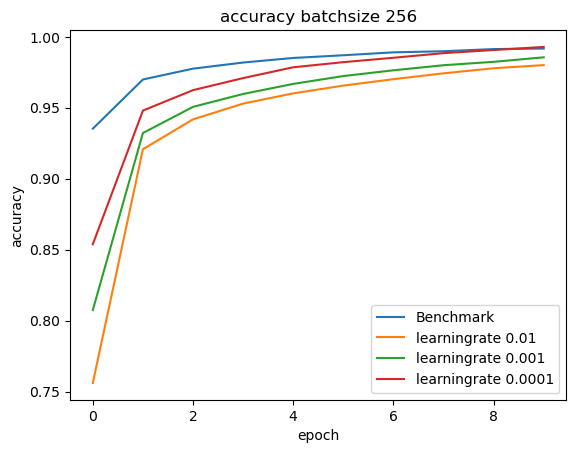

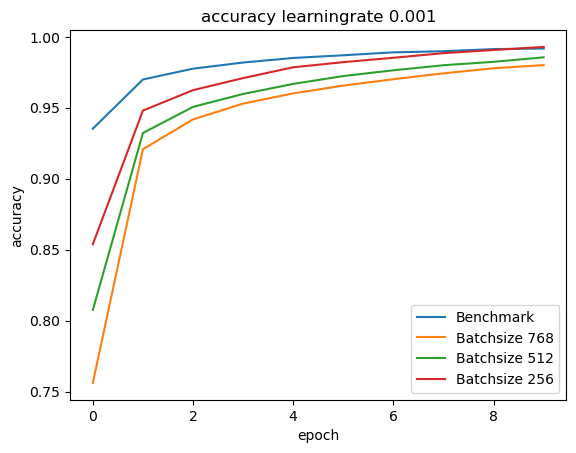

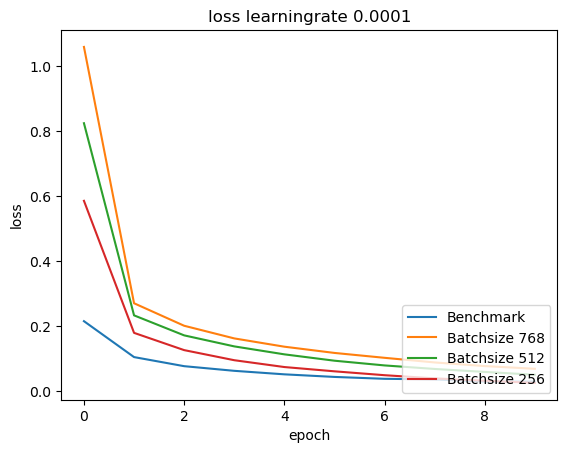

In [13]:
learningrate_list = [0.01, 0.001, 0.0001]
batchsize_list = [768, 512, 256]
history_bs_lr_list = [0, 0, 0, 0, 0, 0, 0, 0, 0]
validation_bs_lr_list = [0, 0, 0, 0, 0, 0, 0, 0, 0]
i = 0
for b in range(3):
    for l in range(3):
        temp_modelname = 'model_b' + str(batchsize_list[b]) +'_l' + str(learningrate_list[l])
        name = 'model_b' + str(batchsize_list[b]) +'_l' + str(learningrate_list[l])
        temp_modelname = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
    
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        ])

        temp_modelname.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learningrate_list[l]),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    
        history_bs_lr_list[i] = temp_modelname.fit(x_train, y_train, batch_size=batchsize_list[b], epochs= 10, shuffle=True)
    
    
        _, validation_temp = temp_modelname.evaluate(x_test, y_test)
        validation_bs_lr_list[i] = round(validation_temp * 100, 2)
        print('validation accuracy of', name, 'is:', validation_bs_lr_list[i], ' %\n' )
        if i == 8:
            plt.plot(history1.history['accuracy'])
            plt.plot(history_bs_lr_list[2].history['accuracy'])
            plt.plot(history_bs_lr_list[5].history['accuracy'])
            plt.plot(history_bs_lr_list[8].history['accuracy'])
                                                               
            plt.title('accuracy batchsize 256')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['Benchmark','learningrate 0.01','learningrate 0.001', 'learningrate 0.0001'], loc='lower right')
            plt.show()
        
            plt.plot(history1.history['accuracy'])
            plt.plot(history_bs_lr_list[2].history['accuracy'])
            plt.plot(history_bs_lr_list[5].history['accuracy'])
            plt.plot(history_bs_lr_list[8].history['accuracy'])
                                                               
            plt.title('accuracy learningrate 0.001')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['Benchmark', 'Batchsize 768','Batchsize 512', 'Batchsize 256'], loc='lower right')
            plt.show()
            
            plt.plot(history1.history['loss'])
            plt.plot(history_bs_lr_list[2].history['loss'])
            plt.plot(history_bs_lr_list[5].history['loss'])
            plt.plot(history_bs_lr_list[8].history['loss'])
                                                               
            plt.title('loss learningrate 0.0001')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['Benchmark', 'Batchsize 768','Batchsize 512', 'Batchsize 256'], loc='lower right')
            plt.show()
            
        i = i+1

In [50]:
print('accuracy of Model b768_l01:    ', validation_bs_lr_list[0], '%')
print('accuracy of Model b768_l001:   ', validation_bs_lr_list[1], '%')
print('accuracy of Model b768_l0001:  ', validation_bs_lr_list[2], '%\n')

print('accuracy of Model b512_l01:    ', validation_bs_lr_list[3], '%')
print('accuracy of Model b512_l001:   ', validation_bs_lr_list[4], '%')
print('accuracy of Model b512_l0001:  ', validation_bs_lr_list[5], '%\n')

print('accuracy of Model b256_l01:    ', validation_bs_lr_list[6], '%')
print('accuracy of Model b256_l001:   ', validation_bs_lr_list[7], '%')
print('accuracy of Model b256_l0001:  ', validation_bs_lr_list[8], '%\n')

accuracy of Model b768_l01:     96.94 %
accuracy of Model b768_l001:    97.82 %
accuracy of Model b768_l0001:   97.06 %

accuracy of Model b512_l01:     96.47 %
accuracy of Model b512_l001:    98.04 %
accuracy of Model b512_l0001:   97.57 %

accuracy of Model b256_l01:     96.4 %
accuracy of Model b256_l001:    97.77 %
accuracy of Model b256_l0001:   97.9 %



After variation of the batch size: 256, 512, 768 and learningrate: 0.01, 0.005, 0.0001, it can be seen that the learningrate of 0.005 is best at each batchsize. If you look at the different batchsizes at this Learningrate, you can see that a lower batch size achieves higher accuracy (see chart Batchsize). A smaller batch size than 256 converges faster, but has a lower validation accuracy. Larger batchsizes needs less trainingtime, but are also inaccurate.

If batch size remains the same, it becomes clear that smaller batch sizes need more epochs to obtain the same accuracy, so learningrate 0.0001 with more epochs will be more accurate than graph of the learningrate 0.01.
If the Learningrate is constant, it becomes recognizable again that the accuracy at 6 epochs is more evident than at 10 epochs, from this it can be revealed that the 3 graphs are closer to closer to more epochs.

<img src = 'Bild1.png'>

<img src = 'learningrate.jpg'>

credit:https://wandb.ai/wandb_fc/german/reports/Was-ist-die-optimale-Batch-Gr-e-um-ein-neuronales-Netz-zu-trainieren---Vmlldzo1NTcwMjk#:~:text=Wir%20verwenden%20kein%20über-parametrisiertes,Batch-Größen%20für%2025%20Epochen.

##Best of

In [16]:
model42 = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
    
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dense(2048, activation='relu'),

    
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

model42.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
    
history_model42 = temp.fit(x_train, y_train, batch_size=32, epochs=20, shuffle=True)
    
    
_, validation_model42 = temp.evaluate(x_test, y_test)
validation_acc_model42 = round(validation_model42 * 100, 2)
print('validation accuracy is:', validation_acc_model42, ' %\n' )

Epoch 1/20
1875/1875 [==============================] - 253s 135ms/step - loss: 0.0140 - accuracy: 0.9957
Epoch 2/20
1875/1875 [==============================] - 254s 136ms/step - loss: 0.0138 - accuracy: 0.9961
Epoch 3/20
1875/1875 [==============================] - 260s 139ms/step - loss: 0.0131 - accuracy: 0.9961
Epoch 4/20
1875/1875 [==============================] - 289s 154ms/step - loss: 0.0092 - accuracy: 0.9971
Epoch 5/20
1875/1875 [==============================] - 253s 135ms/step - loss: 0.0116 - accuracy: 0.9967
Epoch 6/20
1875/1875 [==============================] - 253s 135ms/step - loss: 0.0099 - accuracy: 0.9973
Epoch 7/20
1875/1875 [==============================] - 251s 134ms/step - loss: 0.0082 - accuracy: 0.9977
Epoch 8/20
1875/1875 [==============================] - 253s 135ms/step - loss: 0.0101 - accuracy: 0.9970
Epoch 9/20
1875/1875 [==============================] - 259s 138ms/step - loss: 0.0071 - accuracy: 0.9980
Epoch 10/20
1875/1875 [=======================

I wanted to build a model and let my knowledge flow into it. The model is good, but it is noted that there are positive and negative interactions between the parameters.

## Small Evaluation

In [41]:
model1.save('model1', save_format='h5')
predictions = tf.keras.models.load_model('model1').predict([x_test])
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 5ms/step


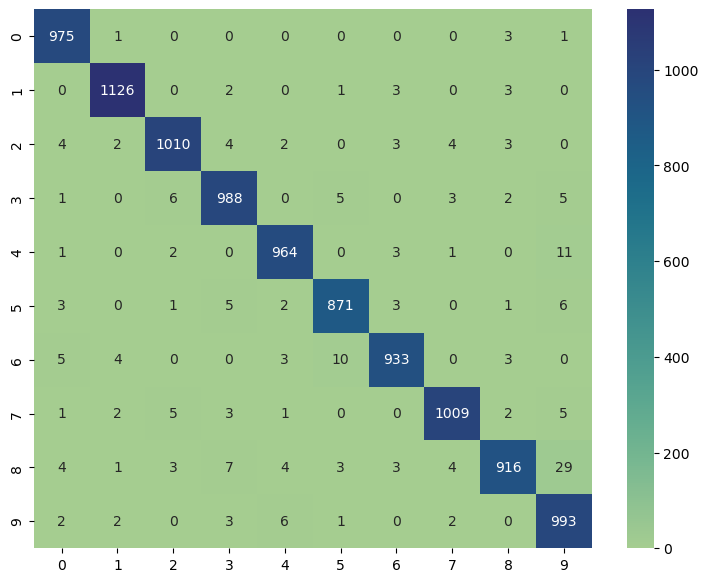

In [42]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap='crest', 
)
plt.show()

In [ ]:
#JustForFun
#%tensorboard --logdir log/fit

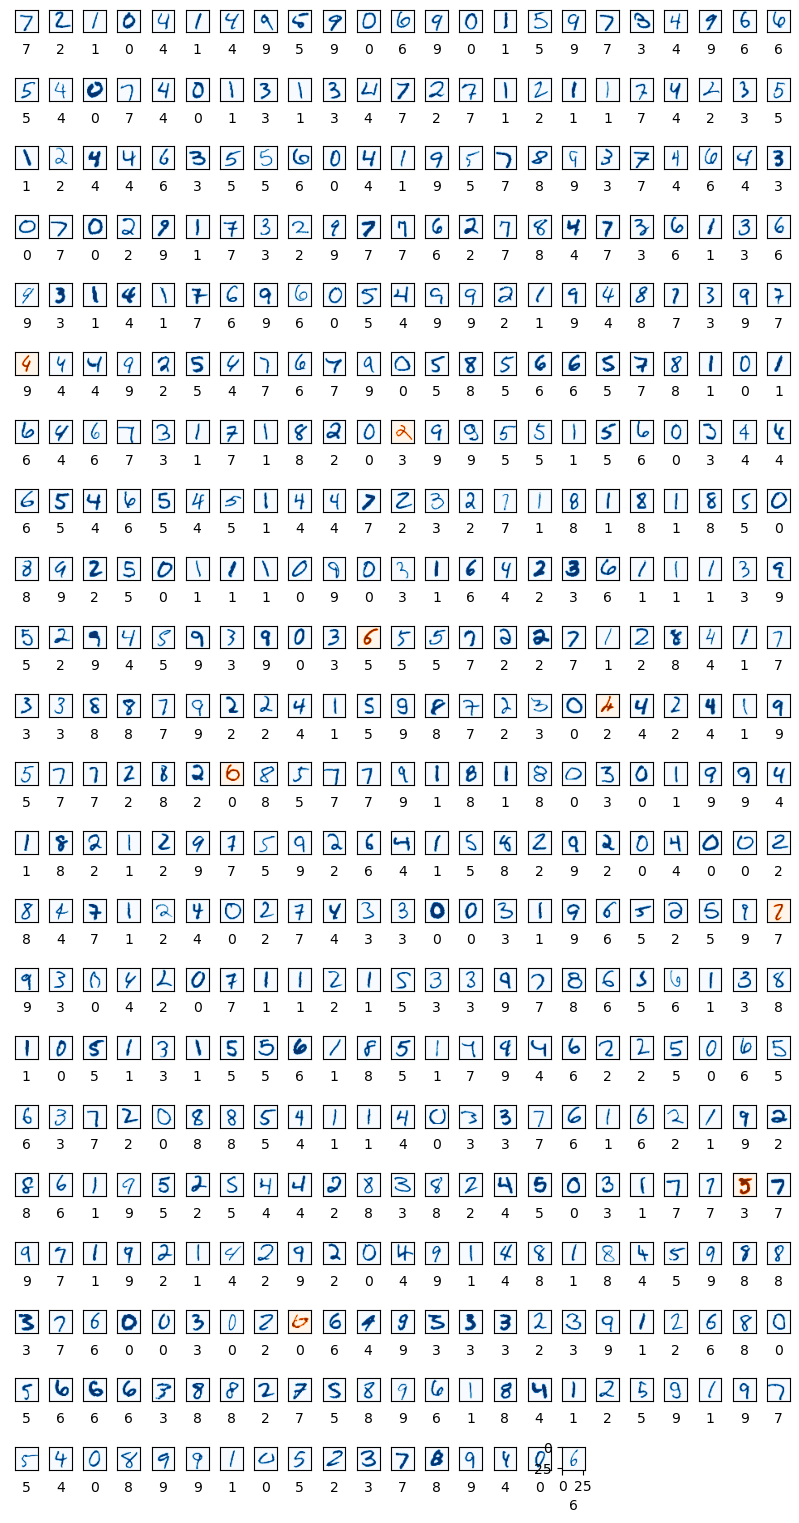

In [43]:
numbers_to_display = 500
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 20))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Blues' if predicted_label == y_test[plot_index] else 'Oranges'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

At the beginning, we looked at the input, now the ouput, green are the report predicted numbers and red the wrong.
To ensure the overview, we only filter out the wrong predictions and look at how the network has decided.

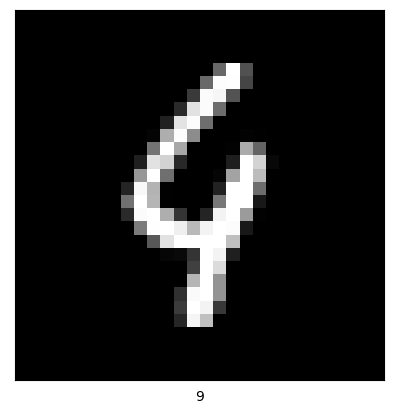

1/1 [==============================] - 0s 113ms/step
[[0.   0.   0.   0.   0.09 0.   0.   0.   0.   0.91]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


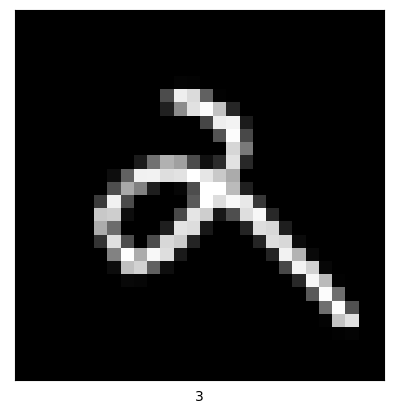

1/1 [==============================] - 0s 22ms/step
[[0.   0.   0.26 0.74 0.   0.   0.   0.   0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


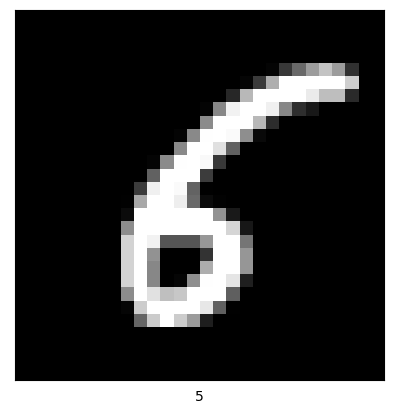

1/1 [==============================] - 0s 22ms/step
[[0.   0.   0.   0.   0.   0.93 0.07 0.   0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


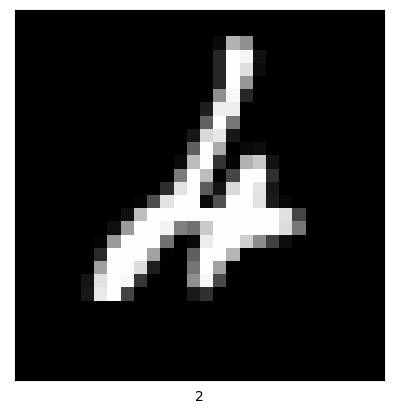

1/1 [==============================] - 0s 24ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


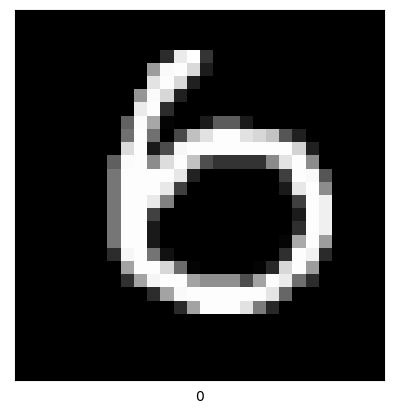

1/1 [==============================] - 0s 22ms/step
[[0.63 0.   0.   0.   0.   0.   0.37 0.   0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


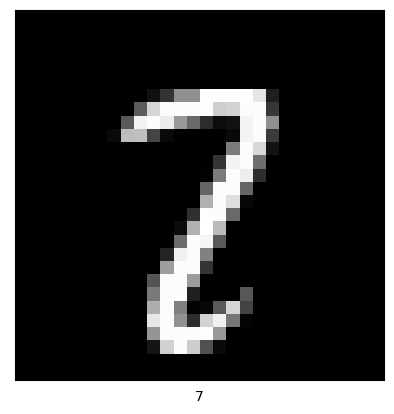

1/1 [==============================] - 0s 29ms/step
[[0.   0.   0.22 0.   0.   0.   0.   0.77 0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


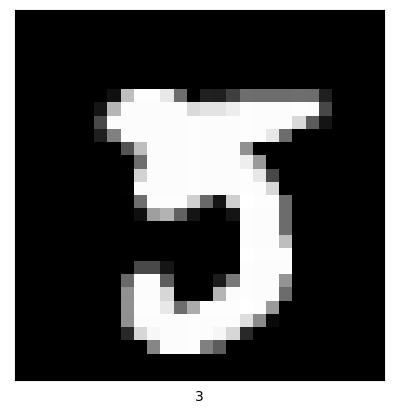

1/1 [==============================] - 0s 22ms/step
[[0.   0.   0.   0.69 0.   0.3  0.   0.   0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


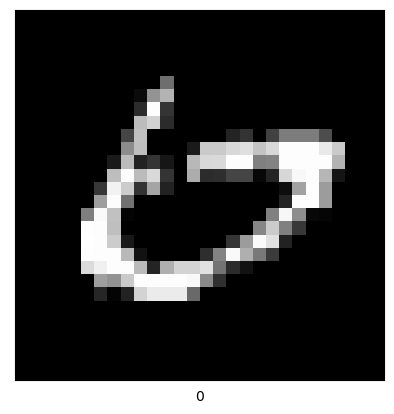

1/1 [==============================] - 0s 22ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


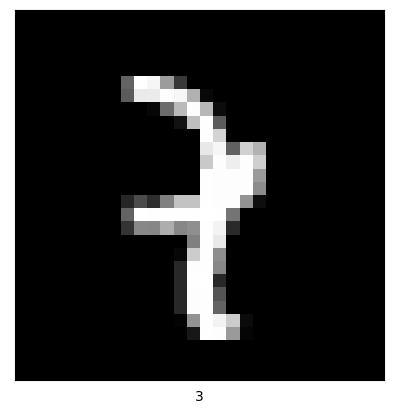

1/1 [==============================] - 0s 35ms/step
[[0.   0.   0.   0.79 0.   0.   0.   0.2  0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


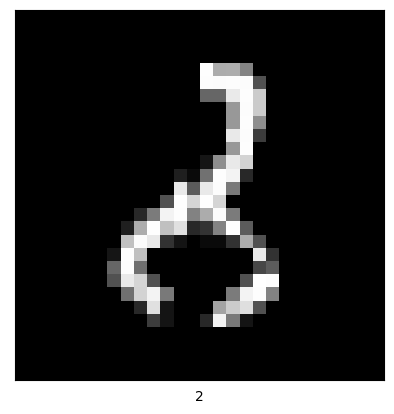

1/1 [==============================] - 0s 29ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


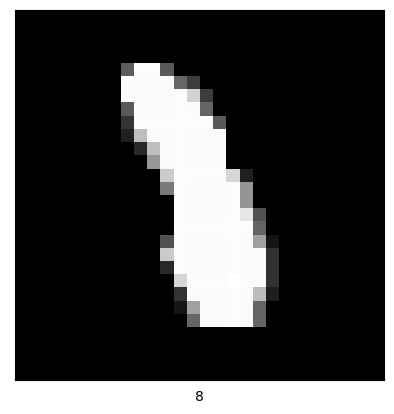

1/1 [==============================] - 0s 22ms/step
[[0.   0.14 0.   0.   0.   0.   0.   0.   0.86 0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


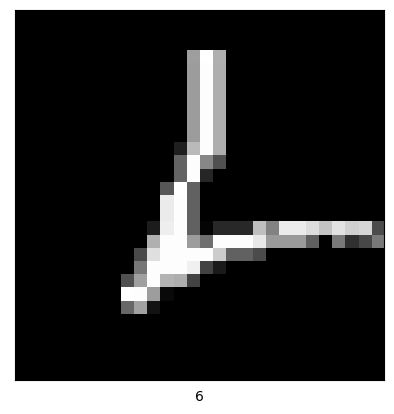

1/1 [==============================] - 0s 22ms/step
[[0.   0.   0.42 0.   0.   0.   0.58 0.   0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


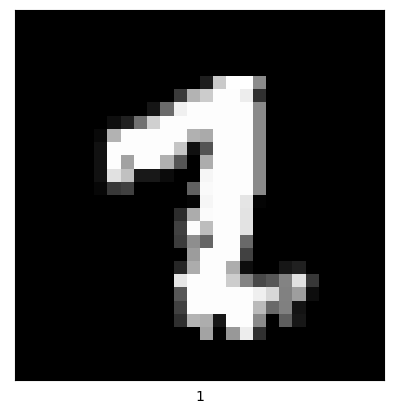

1/1 [==============================] - 0s 24ms/step
[[0.01 0.28 0.24 0.05 0.05 0.01 0.01 0.25 0.07 0.04]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


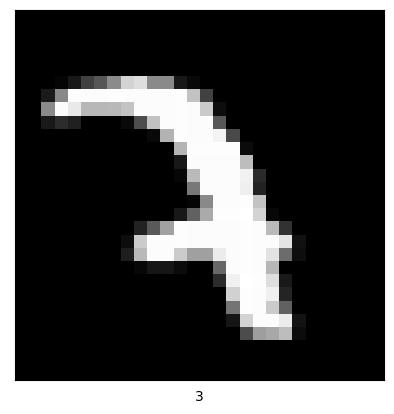

1/1 [==============================] - 0s 34ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


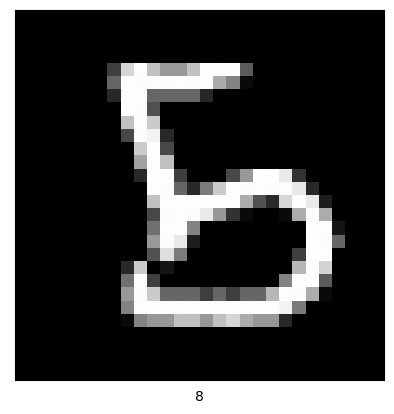

1/1 [==============================] - 0s 27ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


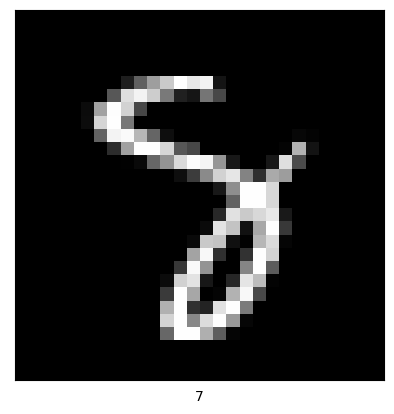

1/1 [==============================] - 0s 31ms/step
[[0.   0.01 0.01 0.01 0.04 0.02 0.   0.74 0.13 0.05]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


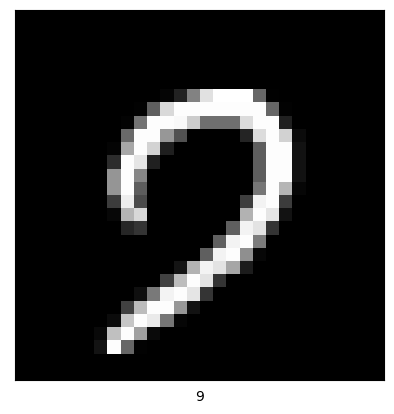

1/1 [==============================] - 0s 29ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.08 0.   0.92]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


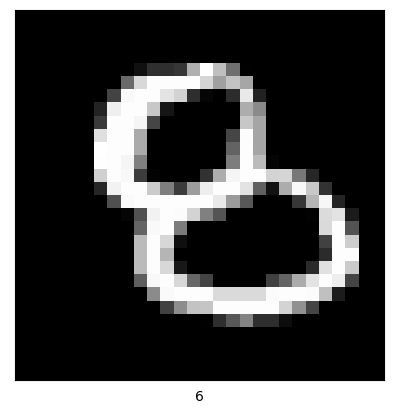

1/1 [==============================] - 0s 27ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


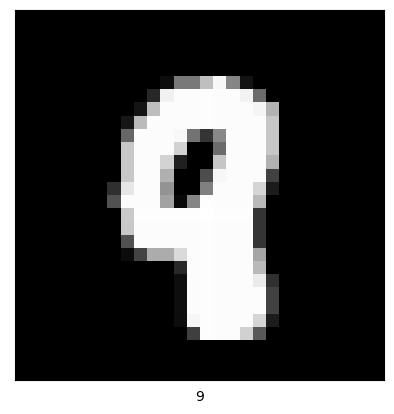

1/1 [==============================] - 0s 29ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


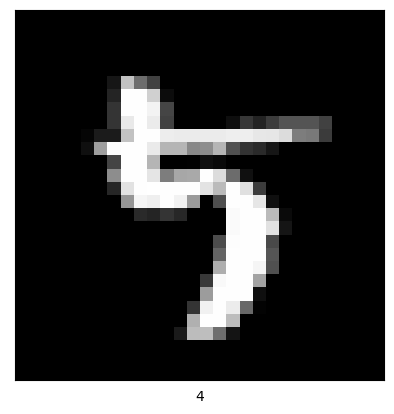

1/1 [==============================] - 0s 26ms/step
[[0.   0.   0.   0.   0.72 0.   0.   0.01 0.   0.26]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


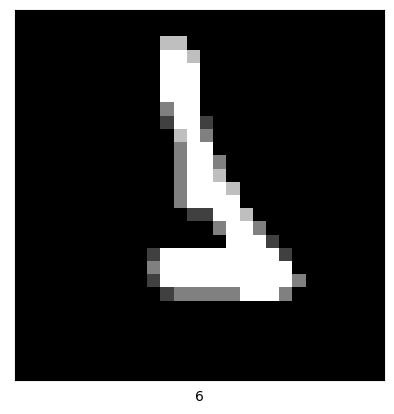

1/1 [==============================] - 0s 37ms/step
[[0.   0.   0.   0.   0.   0.02 0.81 0.   0.17 0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


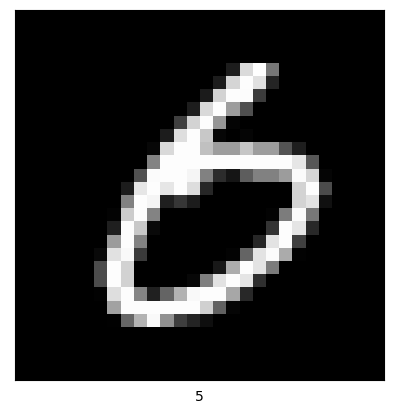

1/1 [==============================] - 0s 29ms/step
[[0.24 0.   0.   0.04 0.   0.69 0.02 0.   0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


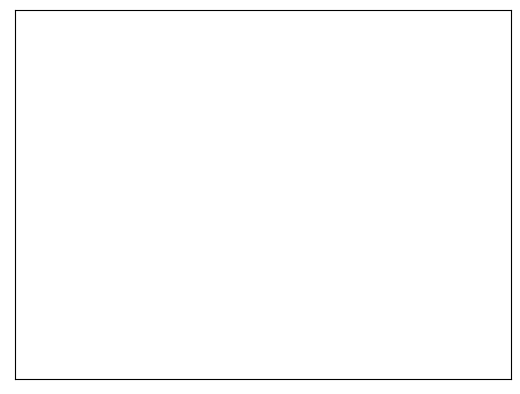

In [47]:
for plot_index in range(1000): 
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if predicted_label != y_test[plot_index]:
        plt.imshow(x_test[plot_index].reshape((28, 28)), cmap='gray')
        plt.xlabel(predicted_label)
        plt.show()
        print (np.round(model1.predict(np.expand_dims(x_test[plot_index],0)),2))
        print('[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]') 

We see problems at the Number two, because he says 0, understandable if you can see them 2 as often here, swung with circle.  However, he also recognizes two as 7, which for me is not so explanatory, one would have to look at the individual falsicles.
As 4, he recognizes 9, also understandable, since the "triangles" at the four and the "circle" at the 9 in the pixel images look very similar.
Otherwise no big flashpoints.
All the wrong numbers are poorly written and difficult to identify even for a human being.
Often the net already has a right tendency, but not sure enough.

Now the end has come, I have tried to put a lot of value on the explainity and try a lot. Of course, you can't test everything and not everything in detail. But I still hope that the parameters and the influence have become clear.

So long and thanks for all the fish

## Summary of the tutorials

### Tutorial 1
We get to know backpropagation with mathematical functions.
Then we use keras and tensorflow libraries to insert layers, optimization and regularizer.
For the first time, we can train, validate and test a model.

### Tutorial 2
How to create a neural network to distinguish between dog and cat. 
We create directories for training and validation for both classes.
A pre-trained neural network is used. Unlike at MNIST, we need an endlayer with yes/no decision.

### Tutorial 3

Earn knowledge about the shape of the architecture called U-Net.
We learn to adjust and expand the data.
2D Convolution, MaxPooling, Concatenation and Dropout functions are essential to build the neuronal network. We need a training and testing generator to run our Unet for cell boundary segmentation